# **Passo 1: Instalar as Bibliotecas**

**Antes de começar a análise, precisamos instalar os pacotes necessários**

In [ ]:
# Instalar bibliotecas
install.packages('ExpDes.pt')  # Pacote para análises estatísticas experimentais
install.packages('readxl')      # Pacote para ler arquivos do Excel

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘stargazer’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**📌 ExpDes.pt: Facilita análises experimentais como ANOVA e Testes de Médias.**

**📌 readxl: Permite a importação de arquivos do Excel para o R.**

# **Passo 2: Importar as Bibliotecas**

**Após a instalação, carregamos as bibliotecas para usá-las no código.**

In [ ]:
# Importar Bibliotecas
library('ExpDes.pt')
library('readxl')

**📌 library() carrega os pacotes para serem utilizados no ambiente do R.**

# **Passo 3: Importar os Dados**

**Agora, importamos o arquivo Excel que contém os dados do experimento.**

In [ ]:
# Importando os dados
dados <- read_excel('/content/mini_curso_fat2_dbc.xlsx')

**📌 read_excel() lê arquivos do Excel. O caminho do arquivo deve estar correto.**

**❗ Dica: Se o arquivo estiver no Google Drive, primeiro ele precisa ser carregado para a pasta correta.**


# **Passo 4: Visualizar os Dados**

**É sempre importante verificar os dados antes de realizar análises.**

In [ ]:
# Ler os primeiros registros do dataset
head(dados)

clones,blocos,espacamento,diametro,altura
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Euca1,1,2.0,3.87,12.07
Euca1,1,2.5,5.58,11.20
Euca1,1,5.0,9.83,11.96
Euca1,1,6.0,11.52,11.37
Euca1,1,7.5,14.84,12.02
Euca1,2,2.0,4.14,13.44


**📌 head() mostra as primeiras linhas do conjunto de dados.**

# **Passo 5: Resumo Estatístico dos Dados**

**Podemos obter estatísticas descritivas rapidamente com a função summary().**

In [ ]:
# Resumo estatístico dos dados
summary(dados)

    clones              blocos      espacamento     diametro     
 Length:60          Min.   :1.00   Min.   :2.0   Min.   : 3.110  
 Class :character   1st Qu.:1.75   1st Qu.:2.5   1st Qu.: 5.155  
 Mode  :character   Median :2.50   Median :5.0   Median :10.250  
                    Mean   :2.50   Mean   :4.6   Mean   : 9.571  
                    3rd Qu.:3.25   3rd Qu.:6.0   3rd Qu.:13.268  
                    Max.   :4.00   Max.   :7.5   Max.   :17.270  
     altura     
 Min.   :10.89  
 1st Qu.:11.77  
 Median :12.21  
 Mean   :12.20  
 3rd Qu.:12.65  
 Max.   :13.82  

**📌 O summary() fornece informações como:**

**✔ Mínimo, máximo, média e mediana das variáveis numéricas.**

**✔ Frequência de variáveis categóricas.**

# **Passo 6: Analisar a Distribuição da Variável "Altura"**

**Para visualizar a distribuição dos dados, utilizamos um histograma.**

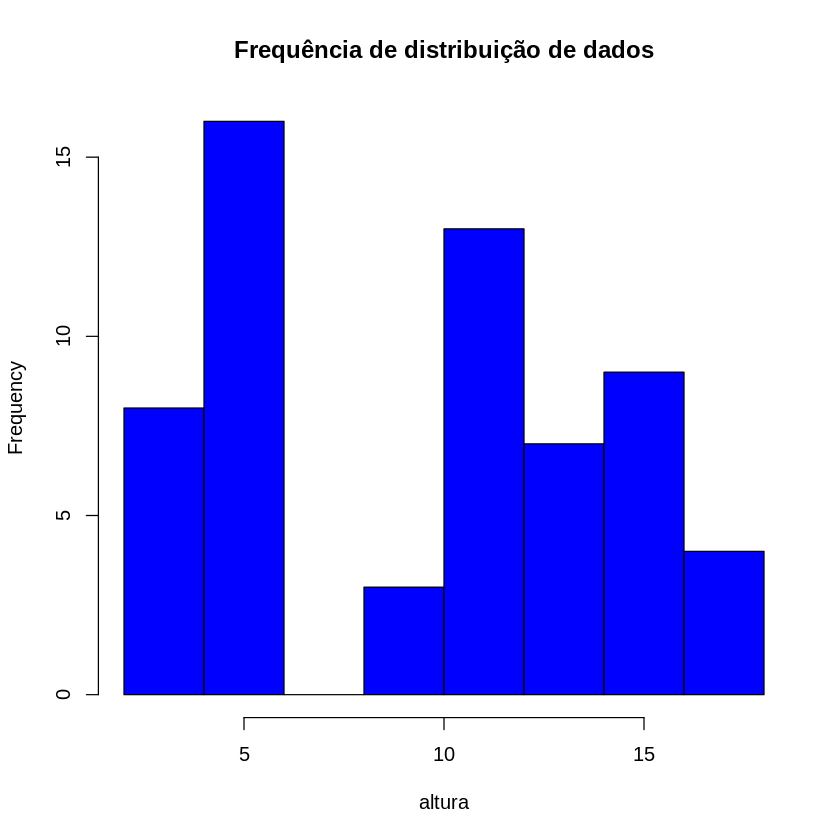

In [ ]:
# Avaliar distribuição da variável "altura"
hist(dados$diametro,
     main='Frequência de distribuição de dados',
     xlab='altura',
     col='blue',
     border='black')

**📌 O hist() cria um histograma, permitindo verificar a normalidade dos dados.**

# **Passo 7: Boxplot da Variável**

**O boxplot é uma ferramenta útil para visualizar a dispersão dos dados e identificar possíveis outliers.**

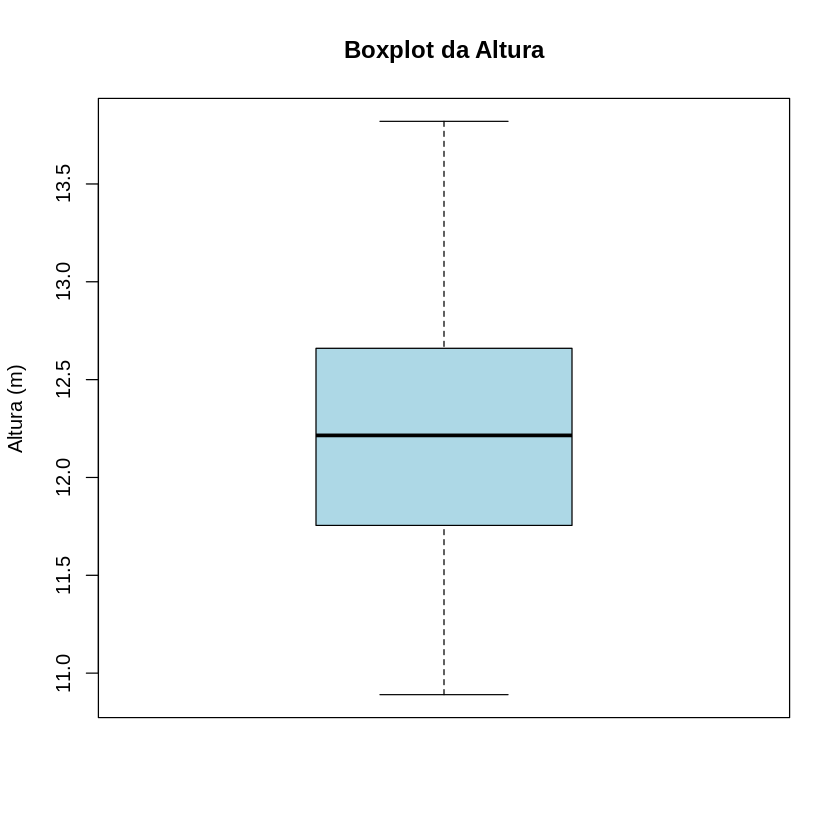

In [ ]:
# Criar um boxplot para a variável "altura"
boxplot(dados$altura,
        main = "Boxplot da Altura",
        ylab = "Altura (m)", col = "lightblue",
        border = "black")

**📌 O boxplot() ajuda a visualizar:**

**✔ A mediana da variável.**

**✔ A dispersão dos dados (quartis).**

**✔ Outliers (valores atípicos que podem influenciar a análise).**

# **Passo 8: ANOVA e Teste de Médias Fatorial em DBC**

**Agora realizamos a análise de variância e o teste de comparação de médias.**

In [ ]:
# ANOVA e Teste de Tukey para DIC
fat2.dbc(dados$clones, dados$espacamento, dados$blocos, dados$diametro,
    quali=c(TRUE, TRUE),       # Variável qualitativa (tratamento)
    mcomp = 'tukey',    # Teste de Tukey para comparar médias
    fac.names = c('Clones','Espaçamentos'), # Definir o nome para as variáveis
    sigT = 0.05,        # Nível de significância para o teste de médias
    sigF = 0.05)        # Nível de significância para a ANOVA

------------------------------------------------------------------------
Legenda:
FATOR 1:  Clones 
FATOR 2:  Espaçamentos 
------------------------------------------------------------------------


Quadro da analise de variancia
------------------------------------------------------------------------
                    GL      SQ QM     Fc   Pr>Fc
Bloco                3    0.05  2    0.2 0.88637
Clones               2    4.30  4   28.0 0.00000
Espaçamentos         4 1199.79  6 3904.7 0.00000
Clones*Espaçamentos  8   20.37  5   33.1 0.00000
Residuo             42    3.23  3               
Total               59 1227.73  1               
------------------------------------------------------------------------
CV = 2.9 %

------------------------------------------------------------------------
Teste de normalidade dos residuos (Shapiro-Wilk)
valor-p:  0.6379961 
De acordo com o teste de Shapiro-Wilk a 5% de significancia, os residuos podem ser considerados normais.
---------------------

**📌 O fat2.dbc() realiza a ANOVA e o Teste de Tukey para um Fatorial duplo em Delineamento em Blocos ao Acaso (DBC).**

**📌 O teste de Bartlett verifica se as variâncias entre os grupos são homogêneas (princípio da ANOVA).**

**📌 O Teste de Tukey compara as médias e indica diferenças estatísticas entre os tratamentos.**

**📌 Conclusão**

**Este código cobre desde a importação dos dados até a realização da análise estatística. Ele permite:**

**✔ Explorar os dados e verificar sua distribuição.**

**✔ Aplicar ANOVA para identificar diferenças entre os tratamentos.**

**✔ Utilizar o Teste de Tukey para determinar quais grupos diferem significativamente.**

**Agora, podemos interpretar os resultados e visualizar as diferenças entre os tratamentos! 🚀**